In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Fuente de info
https://www.puentenet.com/herramientas/exportar-precios

In [2]:
df = pd.read_csv('Indices.csv', header=1)
df.head()

,Instrumento,Fecha,Unnamed: 2,Precio,Var %,Var Anual %,Unnamed: 6,TIR %,Mod. Duration (años)
0,MERVAL,02/12/2019,NaN,"33446,93","-3,05","0,05",NaN,NaN,NaN
1,MERVAL,29/11/2019,NaN,"34500,21","0,82","0,10",NaN,NaN,NaN
2,MERVAL,28/11/2019,NaN,"34219,79","0,85","0,10",NaN,NaN,NaN
3,MERVAL,27/11/2019,NaN,"33929,74","5,66","0,10",NaN,NaN,NaN
4,MERVAL,26/11/2019,NaN,"32113,27","-4,12","0,03",NaN,NaN,NaN


In [3]:
df.Precio = df.Precio.str.replace(',','.').astype(float)
df['Var %'] = df['Var %'].str.replace(',','.').astype(float)
df['Var Anual %'] = df['Var Anual %'].str.replace(',','.').astype(float)

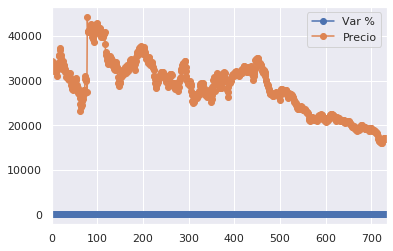

In [4]:
df[(df.Instrumento == 'MERVAL')][['Var %','Precio']].plot(marker='o')

In [5]:
df = df.loc[:,['Instrumento','Fecha','Precio']]
df.Fecha = pd.to_datetime(df.Fecha, format='%d/%m/%Y')

In [6]:
df.Instrumento.unique()

array(['MERVAL', 'NDX', 'CCO', 'MERVAL25', 'IBOV', 'INCH-GB', 'GENERAL',
       'IBMEX', 'DAX', 'IPSA', 'INSP-GB', 'mcx'], dtype=object)

In [7]:
df[df.Precio == 0] = None

In [8]:
df=df.set_index('Fecha').sort_index()

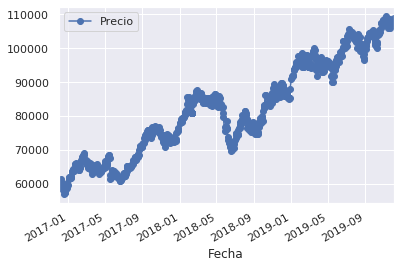

In [9]:
df[(df.Instrumento == 'IBOV')][['Precio']].plot(marker='o')

In [10]:
df_gr = df.groupby(['Fecha','Instrumento']).mean()
df_gr.head(10)

Precio
Fecha      Instrumento           
2016-12-01 CCO            5251.11
           DAX           10534.05
           GENERAL      742517.64
           IBOV          59506.53
           INCH-GB        3273.31
           INSP-GB        8669.20
           IPSA           4197.48
           MERVAL        17041.98
           MERVAL25      18403.79
           NDX            4734.10

In [11]:
df_gr = df_gr.unstack()
df_gr.head()

Precio                                                        \
Instrumento      CCO       DAX    GENERAL IBMEX      IBOV  INCH-GB INSP-GB   
Fecha                                                                        
2016-12-01   5251.11  10534.05  742517.64   NaN  59506.53  3273.31  8669.2   
2016-12-02   5255.65  10513.35  741135.06   NaN  60316.13  3243.84  8607.1   
2016-12-05   5308.89  10684.83  740531.89   NaN  59831.72  3204.71  8664.7   
2016-12-06   5333.00  10775.32  746463.91   NaN  61088.24  3199.65  8893.3   
2016-12-07   5393.76  10986.69  746557.54   NaN  61414.40  3222.24  8960.4   

                                                            
Instrumento     IPSA    MERVAL  MERVAL25      NDX      mcx  
Fecha                                                       
2016-12-01   4197.48  17041.98  18403.79  4734.10  2121.87  
2016-12-02   4202.98  16947.76  18296.47  4739.37  2128.99  
2016-12-05   4206.44  16999.02  18347.67  4778.14  2158.33  
2016-12-06   4214.38  17235.21  18600.82  4788.67  2152.35  
2016-12-07   4224.67  17196.77  18561.06  4851.94  2160.51

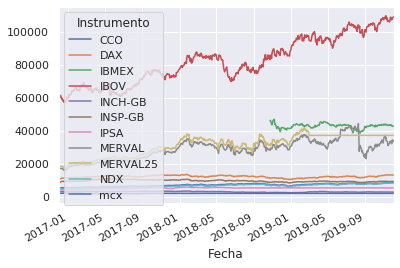

In [12]:
df_gr.Precio.drop('GENERAL',axis=1).interpolate().plot()

In [13]:
df_gr.head()

Precio                                                        \
Instrumento      CCO       DAX    GENERAL IBMEX      IBOV  INCH-GB INSP-GB   
Fecha                                                                        
2016-12-01   5251.11  10534.05  742517.64   NaN  59506.53  3273.31  8669.2   
2016-12-02   5255.65  10513.35  741135.06   NaN  60316.13  3243.84  8607.1   
2016-12-05   5308.89  10684.83  740531.89   NaN  59831.72  3204.71  8664.7   
2016-12-06   5333.00  10775.32  746463.91   NaN  61088.24  3199.65  8893.3   
2016-12-07   5393.76  10986.69  746557.54   NaN  61414.40  3222.24  8960.4   

                                                            
Instrumento     IPSA    MERVAL  MERVAL25      NDX      mcx  
Fecha                                                       
2016-12-01   4197.48  17041.98  18403.79  4734.10  2121.87  
2016-12-02   4202.98  16947.76  18296.47  4739.37  2128.99  
2016-12-05   4206.44  16999.02  18347.67  4778.14  2158.33  
2016-12-06   4214.38  17235.21  18600.82  4788.67  2152.35  
2016-12-07   4224.67  17196.77  18561.06  4851.94  2160.51

In [14]:
import pandas_profiling

In [15]:
df_col = pd.DataFrame(df_gr.to_records())
df_col.head()

,Fecha,"('Precio', 'CCO')","('Precio', 'DAX')","('Precio', 'GENERAL')","('Precio', 'IBMEX')","('Precio', 'IBOV')","('Precio', 'INCH-GB')","('Precio', 'INSP-GB')","('Precio', 'IPSA')","('Precio', 'MERVAL')","('Precio', 'MERVAL25')","('Precio', 'NDX')","('Precio', 'mcx')"
0,2016-12-01,5251.11,10534.05,742517.64,NaN,59506.53,3273.31,8669.2,4197.48,17041.98,18403.79,4734.10,2121.87
1,2016-12-02,5255.65,10513.35,741135.06,NaN,60316.13,3243.84,8607.1,4202.98,16947.76,18296.47,4739.37,2128.99
2,2016-12-05,5308.89,10684.83,740531.89,NaN,59831.72,3204.71,8664.7,4206.44,16999.02,18347.67,4778.14,2158.33
3,2016-12-06,5333.00,10775.32,746463.91,NaN,61088.24,3199.65,8893.3,4214.38,17235.21,18600.82,4788.67,2152.35
4,2016-12-07,5393.76,10986.69,746557.54,NaN,61414.40,3222.24,8960.4,4224.67,17196.77,18561.06,4851.94,2160.51


In [16]:
df_col = df_col.set_index('Fecha').interpolate()

In [17]:
df_col = df_col.drop(["('Precio', 'IBMEX')"], axis=1)

In [18]:
df_col.profile_report()

In [22]:
df_col.reset_index().to_feather('Indices.feather')

In [20]:
df_col.head()

,"('Precio', 'CCO')","('Precio', 'DAX')","('Precio', 'GENERAL')","('Precio', 'IBOV')","('Precio', 'INCH-GB')","('Precio', 'INSP-GB')","('Precio', 'IPSA')","('Precio', 'MERVAL')","('Precio', 'MERVAL25')","('Precio', 'NDX')","('Precio', 'mcx')"
Fecha,,,,,,,,,,,
2016-12-01,5251.11,10534.05,742517.64,59506.53,3273.31,8669.2,4197.48,17041.98,18403.79,4734.10,2121.87
2016-12-02,5255.65,10513.35,741135.06,60316.13,3243.84,8607.1,4202.98,16947.76,18296.47,4739.37,2128.99
2016-12-05,5308.89,10684.83,740531.89,59831.72,3204.71,8664.7,4206.44,16999.02,18347.67,4778.14,2158.33
2016-12-06,5333.00,10775.32,746463.91,61088.24,3199.65,8893.3,4214.38,17235.21,18600.82,4788.67,2152.35
2016-12-07,5393.76,10986.69,746557.54,61414.40,3222.24,8960.4,4224.67,17196.77,18561.06,4851.94,2160.51
